<a href="https://colab.research.google.com/github/fernandoantonio36/datascience/blob/main/Plano_sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto etapas do processamento do Big Data

O objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra, baseando-se no peso e no colesterol. 

###Enunciado do problema
Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a
relação entre os dados de colesterol e peso com a incidência de problemas que
influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos
seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e
tratamento para esses tipos de causa, a operadora quer realizar um estudo para
identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar medidas preventivas e palestras de cuidados médicos. Para isso, a operadora conta com a equipe de arquiteto de big data para ajuda-los a encontrar o grupo de risco dentre essas pessoas. Através da análise dos dados, os analistas da operadora de seguro de saúde identificaram 4 grandes grupos:

1.   Alto Risco
2.   Risco Moderado alto
3.   Risco Moderado baixo
4.   Baixo risco





Para isso, iremos exercitar os seguintes conceitos trabalhados no Módulo: 
  
*   Coleta de dados
*   Manipulação e visualização de dados
*   Tratamento de dados
*   Aplicação de algoritmo de Machine Learning
*   Análise de dados gerados
*   Conhecimento teórico ministrado nas videoaulas



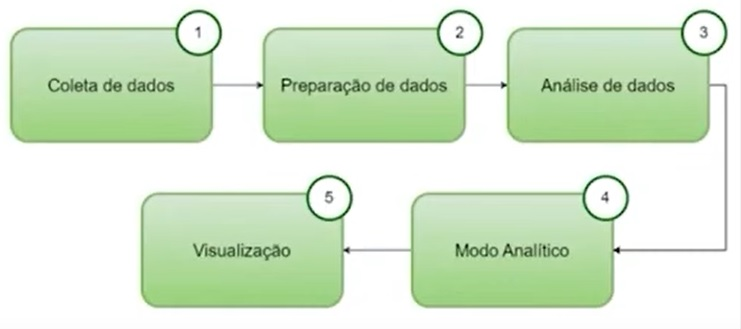


## PASSO 1: IMPORT DAS LIBS NECESSÁRIAS

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenação de gráficos

## PASSO 2: COLETA DOS DADOS

Nessa etapa, são definidos as fontes a serem utilizadas para gerar armazenamento, podendo ser banco de dados, SQL, NoSQL, Frameworks e muitas outras fontes.

Para esse desafio, vamos coletar dados já estruturados de 3 arquivos, um em xls e outros dois em csv.

###  Coletando dados de estados brasileiros

In [4]:
estados = pd.read_csv('estados_brasileiros.csv', sep =';', encoding='latin-1')
estados.head()



,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [5]:
estados[:27]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espírito Santo,es,Brasil
8,9,Goiás,go,Brasil
9,10,Maranhão,ma,Brasil


###  Coletando dados de clientes

In [6]:
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


###  Coletando dados da idades dos clientes

In [7]:
idades = pd.read_csv('idade_clientes.csv', sep =';', encoding='latin-1')
idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


## PASSO 3: PREPARAÇÃO DOS DADOS

Etapa minuciosa em que os dados são limpos e tornam-se aptos para análise. Esse estágio tem a função de reduzir discrepâncias, eliminar os valores nulos, indicar as anomalias e preencher lacunas. Esses dados, se não tratados, acabam prejudicando o processo como um todo, já que a análise e a informação obtida poderá estar comprometida caso esses dados não sejam verdadeiros.

### Analisando as variáveis das bases de dados

#### Base de dados Estados

In [8]:
print("\nAs informações básicas da base de dados Estados: ")
estados.info()

print("\nas estatísticas básicas da base de dados Estados: ")
estados.describe()


As informações básicas da base de dados Estados: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes

as estatísticas básicas da base de dados Estados: 


,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


####Base de dados Clientes

In [9]:
print("\nAs informações básicas da base de dados Clientes: ")
clientes.info()

print("\nas estatísticas básicas da base de dados Clientes: ")
clientes.describe()


As informações básicas da base de dados Clientes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB

as estatísticas básicas da base de dados Clientes: 


,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


####Base de dados Idades

In [10]:
print("\nAs informações básicas da base de dados Idades: ")
idades.info()

print("\nas estatísticas básicas da base de dados Idades: ")
idades.describe()



As informações básicas da base de dados Idades: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB

as estatísticas básicas da base de dados Idades: 


,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### Verificando se há dados ausentes (nulos)

In [11]:
print("Identificando valores nulos/ausentes na base de dados Estados: ")
estados.isna().sum()

Identificando valores nulos/ausentes na base de dados Estados: 


id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [12]:
print("Identificando valores nulos/ausentes na base de dados Clientes: ")
clientes.isna().sum()

Identificando valores nulos/ausentes na base de dados Clientes: 


id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [13]:
print("Identificando valores nulos/ausentes na base de dados Idades: ")
idades.isna().sum()

Identificando valores nulos/ausentes na base de dados Idades: 


id_cliente    0
idade         0
dtype: int64

### Verificando os registros com valores nulos

In [14]:
print("Registros com valores nulos na base de dados Estados: ")
estados.loc[estados['pais'].isnull()]

Registros com valores nulos na base de dados Estados: 


,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


In [15]:
print("Registros com valores nulos na base de dados Clientes: ")
clientes.loc[clientes['peso'].isnull()]

Registros com valores nulos na base de dados Clientes: 


,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


### Eliminando os registros com dados ausentes

In [16]:
#elimina o registro inplace=true faz a alteração acontecer neste datafram

estados.dropna(subset=['pais'], inplace=True) 
clientes.dropna(subset=['peso'], inplace=True)

In [17]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [18]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [19]:
estados.count() #quantidade de registros após a retirada dos registros com dados nulos

id_estado       25
estado          25
sigla_estado    25
pais            25
dtype: int64

In [20]:
clientes.count() #quantidade de registros após a retirada dos registros com dados nulos

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

### Analisando a distribuição dos dados


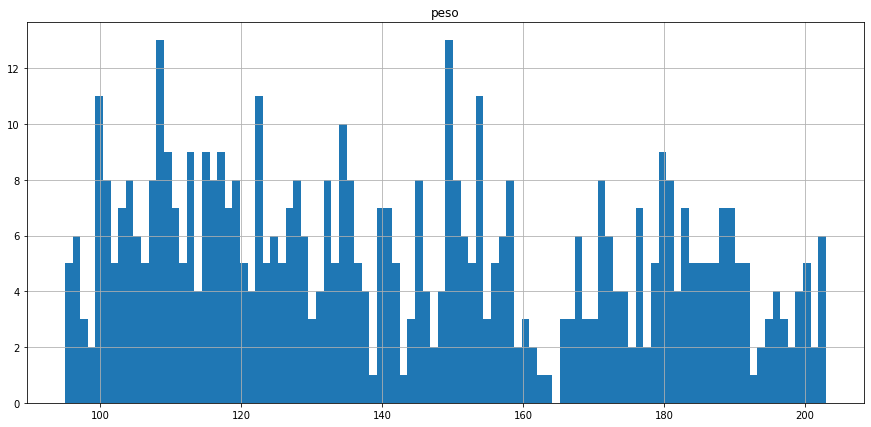

In [21]:
#Histograma 

clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

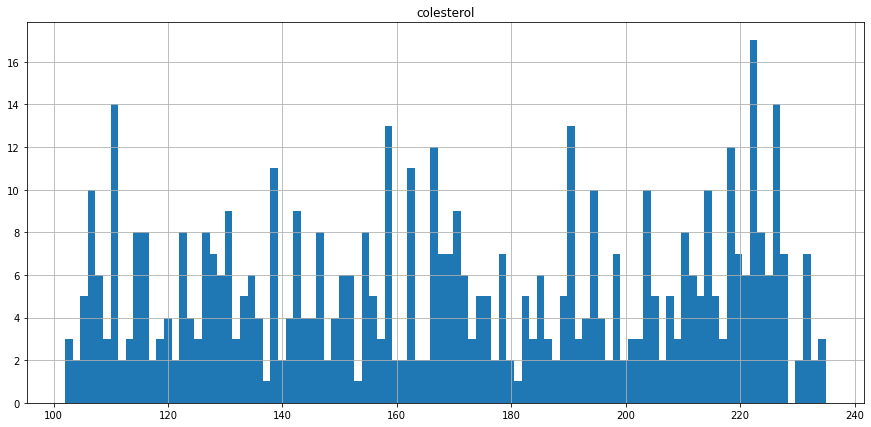

In [22]:
#Histograma 

clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

In [23]:
#Criando um identificador para a variável genero
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [24]:
clientes


,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


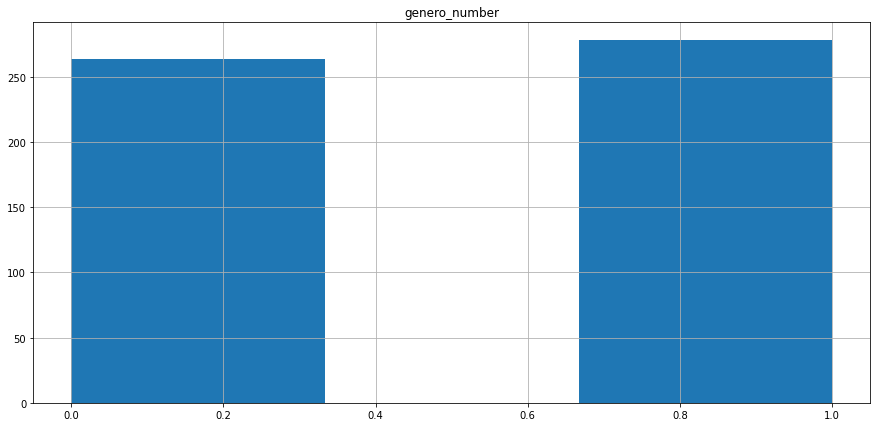

In [25]:
#Histograma 

clientes.hist(column='genero_number', figsize=(15,7), bins=3)
plt.show()

### Junções entre os dados coletados

Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta.

In [26]:
estados[:27]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espírito Santo,es,Brasil
8,9,Goiás,go,Brasil
9,10,Maranhão,ma,Brasil


In [27]:
clientes[:7]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
5,6,198.0,227,Masculino,8,1
6,7,114.0,131,Masculino,26,1


In [28]:
#Junção da tabelas estados e clientes pelo id_estado
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados = clientes_estados.sort_values('id_cliente')

In [29]:
clientes_estados[:10]

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
65,7,114.0,131,Masculino,26,1,Sergipe,se,Brasil
101,8,145.0,176,Feminino,25,0,São Paulo,sp,Brasil
113,9,191.0,223,Feminino,16,0,Paraná,pr,Brasil
131,10,186.0,221,Masculino,6,1,Ceará,ce,Brasil
156,11,104.0,116,Feminino,3,0,Amapá,ap,Brasil


In [30]:
# Juntando a tabela idades à tabela clientes_estados pelo id_cliente
base_completa = pd.merge(clientes_estados, idades, on='id_cliente').sort_values('id_cliente')

In [31]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [32]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


### Organizando a base de dados

Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas

In [33]:
#Alterando nome das colunas
base_completa.rename(columns={'id_cliente':'cod_cliente', 'genero_number':'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [34]:
# Alterando as linhas da variável sigla_estado
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [35]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


In [36]:
# Alterando disposição das colunas do arquivo de dados (para facilitar a visualização)

base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop=True)

In [37]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


## PASSO 4: ANÁLISE DOS DADOS

É a etapa onde selecionamos os algoritmos de Machine learning que serão inseridos para alcançar o rseultado, levando em consideração o conjunto de dados obtidos na etapa anterior.
Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colesterol, peso e idade das pessoas.

### Aplicando o método do cotovelo

Vamos iniciar a visualização, identificando o número de clusters necessário para realizar o agrupamento

In [38]:
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [39]:
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [40]:
wcss_clientes = calcular_wcss(dados_cliente)

In [41]:
# Visualizando os dados obtidos do WCSS

for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 1248240.6686746986
O cluster 1 possui valor de WCSS de: 298948.24481836386
O cluster 2 possui valor de WCSS de: 127838.91656630888
O cluster 3 possui valor de WCSS de: 73845.59061500775
O cluster 4 possui valor de WCSS de: 48983.64311112845
O cluster 5 possui valor de WCSS de: 34106.00009151609
O cluster 6 possui valor de WCSS de: 25083.6023860119
O cluster 7 possui valor de WCSS de: 20430.25429130302
O cluster 8 possui valor de WCSS de: 15949.212764272976
O cluster 9 possui valor de WCSS de: 13385.701087252197


In [42]:
# Visualizando o gráfico do cotovelo

grafico_wcss = px.line(x=range(1,11), y=wcss_clientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando o WCSS',xaxis_title='Número de clusters', yaxis_title='Valor do Wcss', template='plotly_white')
fig.show()

In [43]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [44]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


In [45]:
# Calculando os centroides de cada cluster

centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [58]:
# Aqui temos os centroides dos 4 clusters de acordo com os atributos. Nesse exemplo vamos os centroides de 'peso' e 'colesterol', respectivamente.


grafico = px.scatter(x=base_completa['peso'], y=base_completa['colesterol'], color=base_completa['cluster'])

grafico_centroide = px.scatter(x=centroides_clusters[:,0], y=centroides_clusters[:,1], size = [7,7,7,7])

grafico_final_petala = go.Figure(data=grafico.data + grafico_centroide.data)

grafico_final_petala.update_layout(title='Análise de Clusters', xaxis_title='peso', yaxis_title='colesterol')

grafico_final_petala.show()

### Segmentando os clientes, baseando-se na análise dos clusters

Agora, vamos analisar os dados dos clusters referentes aos atributos pesos e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar em 4 tipos:


*   Alto Risco : Peso e colesterol altos
*   Risco Moderado Alto : Peso e colesterol medianos altos
*   Risco Moderado Baixo : Peso e colesterol medianos baixos
*   Baixo Risco: Peso e colesterol baixos

In [47]:
#Criando uma cópia da base completa
cluster_clientes = base_completa

In [49]:
#Seguimentando os cliente, baseando-se na análise dos clusters

cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'Risco Moderado Alto'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Risco Moderado Baixo'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Baixo Risco'

In [50]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado Baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado Baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo Risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado Baixo


In [54]:
# Análise dos clusters criados

cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo Risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado Alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado Baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [55]:
# Análise dos clusters criados

cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo Risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado Alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado Baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [56]:
# Análise dos clusters criados

cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado Alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [59]:
cluster_clientes.groupby(['nome_cluster','genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Baixo Risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado Alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado Baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Baixo Risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado Alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Risco Moderado Baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0